In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix
import random
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("Group_15_Resampled_Data.csv")

In [13]:
df.head()

,Unnamed: 0,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
0,0,0.0,4.125014,5.841922e-01,-5.446979,-0.835088,6.946014e+00,1.0,1.0,3.0,3.0,1.0,0.0
1,1,0.0,4.148253,9.999992e-07,-0.651148,-0.000639,9.999995e-07,0.5,2.0,5.0,2.0,0.0,0.0
2,2,0.0,4.142773,5.841922e-01,-0.651148,-1.517376,9.999995e-07,0.5,2.0,5.0,1.0,2.0,0.0
3,3,0.0,4.145137,5.841922e-01,0.000000,-0.895270,9.999995e-07,0.5,2.0,3.0,1.0,2.0,0.0
4,4,0.0,4.114886,5.841922e-01,-4.324716,-0.034032,9.999995e-07,0.5,2.0,2.0,1.0,1.0,0.0


In [14]:
df = df.iloc[:,1:]

In [15]:
df['Label-0/1'].value_counts()

0.0    414130
1.0    414130
Name: Label-0/1, dtype: int64

In [16]:
X = df.drop(['Label-0/1'], axis = 1)
y = df['Label-0/1']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
    random_state = 42,
    test_size = 0.2)

In [18]:
lr_sgd = SGDClassifier(
    loss = 'log',
    penalty = 'elasticnet',
    n_jobs = -1,
    random_state = 42,
    class_weight = 'balanced'
)

lr_sgd.fit(X_train, y_train)

C:\Users\Sam\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(class_weight='balanced', loss='log', n_jobs=-1,
              penalty='elasticnet', random_state=42)

In [19]:
lr_hyperparam = RandomizedSearchCV(
    estimator = lr_sgd,
    param_distributions = {
        'alpha' : [0.001, 0.01, 0.1, 1.0, 10]
    },
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1,
    random_state = 42,
    return_train_score = True,
    n_iter = 25
)

lr_hyperparam.fit(X_train,y_train)

C:\Users\Sam\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=25. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Sam\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


RandomizedSearchCV(estimator=SGDClassifier(class_weight='balanced', loss='log',
                                           n_jobs=-1, penalty='elasticnet',
                                           random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1.0, 10]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [20]:
lr_hyperparam.best_params_

{'alpha': 0.001}

In [22]:
lr_full = SGDClassifier(
    alpha = 0.001,
    loss = 'log',
    penalty = 'elasticnet',
    n_jobs = -1,
    random_state = 42,
    class_weight = 'balanced'
)

lr_full.fit(X_train, y_train)

C:\Users\Sam\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.001, class_weight='balanced', loss='log', n_jobs=-1,
              penalty='elasticnet', random_state=42)

In [23]:
lr_pred = lr_full.predict(X_train)

In [24]:
#accuracy_score
acc = accuracy_score(y_train,lr_pred)
print("The accuracy of the model is ", acc*100)

The accuracy of the model is  60.46833120034771


In [25]:
#recall_score 
recall=recall_score(y_train,lr_pred)
print("The recall score for the applied algorithm",recall)

The recall score for the applied algorithm 0.755338387177606


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
cm = confusion_matrix(y_train, lr_pred)

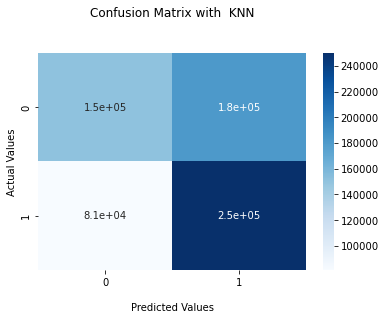

In [28]:
#confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with Logistic Regression \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Display the visualization of the Confusion Matrix.
plt.show()